___
# Atividade: Bootstrapping
___

## Aula 22

## Contexto Teórico


**Preparo Prévio:**
1. Magalhães e Lima, seção 7.4. Concentrar-se em intervalo de confiança para média POPULACIONAL
1. Bootstrapping - https://www.thoughtco.com/example-of-bootstrapping-3126155
1. Bootstrapping - https://www.stat.auckland.ac.nz/~wild/BootAnim/

**Hoje:**
1. Entender e implementar o método não paramétrico de Bootstrapping com intuito de avaliar se um parâmetro é igual a um determinado valor ou se parâmetro é  $\neq$ que esse determinado valor.


___

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

___
## Motivação:

Uma gerente de uma fábrica decidiu recalibrar uma das máquinas da linha de produção para AJUSTAR o seu tempo médio de execução. A amostra abaixo representa o tempo medido entre a entrada do bloco cru e a saída manufaturada em minutos.

In [2]:
x = [0.69689142,  0.57995802,  0.06450754,  0.61206626,  0.91976314,  0.34363861,  0.82575631,  
     0.41666036,  0.62153527,  0.56757104,  0.86683518,  0.28922458,  0.28521698]

n = len(x)

print("Tamanho da Amostra: {0}".format(n))
print("Média: {0}".format(np.mean(x)))
print("Desvio Padrão: {0}".format(np.std(x, ddof=1)))

Tamanho da Amostra: 13
Média: 0.5453557469230769
Desvio Padrão: 0.2547555304406469


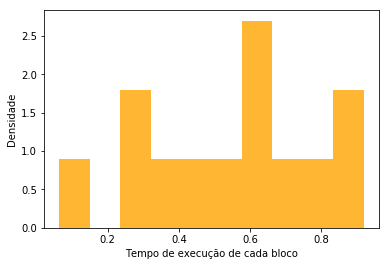

In [3]:
plt.hist(x, density=True, color='orange', alpha=0.8)
plt.xlabel("Tempo de execução de cada bloco")
plt.ylabel("Densidade");

## Problema: 

Excepcionalmente hoje, os funcionários estavam reclamando que o tempo médio de execução da linha de produção está com comportamento diferente do usual, pois o tempo de execução histórico demora em média $0.68$ minutos. 

Avalie se a reclamação dos funcionários procede, com 95% de confiança?


## Qual técnica inferencial utilizar para resolver tal problema?

___
## Considerações do que temos até o momento:

Como visto em aulas passadas, para poder realizar um Teste de Hipóteses clássico quando o problema questiona a média populacional, ou seja, $\mu$, temos as seguintes premissas (suposições):

   1. **Primeiro resultado:** 
      -  A variável de interesse $X$ tiver distribuição **EXATA** normal, então **cada $X_i$ é normal** e a distribuição da média amostral $\overline{X}=\frac{X_1+X_2+...+X_n}{n}=\frac{\sum_{i=1}^nX_i}{n}$ é **EXATA** Normal.
            
      -  A variável de interesse $X$ tiver distribuição desconhecida ou não normal, então **cada $X_i$ não é normal** e a distribuição da média amostral $\overline{X}=\frac{X_1+X_2+...+X_n}{n}=\frac{\sum_{i=1}^nX_i}{n}$ é **APROXIMADA** Normal, via TLC, **considerando $n$ suficientemente grande**.  
      
   
   2. **Segundo resultado:**
      - Quando a **variância populacional $\sigma^2$ é conhecida**, pode-se usar:
        
        $\Rightarrow$ $\overline{X}\sim N(\mu,\sigma^2/n)$ $\Rightarrow$ $\frac{\overline{X}-\mu}{\sigma/\sqrt{n}}\sim N(0,1)$,
        quando $X$ tem normal ou quando $n$ é suficientemente grande.
      
      - Quando a **variância populacional $\sigma^2$ é DESconhecida**, pode-se usar:
        
        $\Rightarrow$ $\frac{\overline{X}-\mu}{S/\sqrt{n}}\sim t(n-1)$,
        quando $X$ tem normal ou quando $n$ é suficientemente grande, sendo $S$ o desvio padrão AMOSTRAL.
      

## **Resumindo**: Quando não sabemos qual é a distribuição de $X$ e nem podemos assumir que $n$ é suficientemente grande, uma nova técnica se faz necessária!!!
___

___

# Bootstrapping

## Solução: Métodos não paramétricos

Bootstrapping é um método de reamostragem com reposição que consiste em recuperar a distribuição de uma medida de interesse a partir de uma amostra mestre. Por exemplo, podemos utilizar a média como medida de interesse, mas a distribuição de outras medidas também pode ser estimadas, como por exemplo variância, mediana, máximo, etc.

Reamostragem com reposição significa que um mesmo elemento pode ser selecionado várias vezes, assim como outro elemento pode não ser escolhido. Seria equivalente a sortear um número e colocar de volta na urna.

### Como funciona

Dada um conjunto com a amostra mestre aleatória $x_1, x_2,..., x_n$ de uma população qualquer, devemos sortear consecutivamente, com reposição, conjuntos de tamanho também $n$ dessa amostra amostra mestre. Esses conjuntos são chamados de reamostragem e esse processo deve ser feito milhares de vezes.

A cada reamostragem deve-se aplicar a medida de interesse e guardar em uma lista. Ao fim das milhares de reamostragens, teremos uma distribuição da medida desejada. 

De posse desta distribuição, podemos calcular o Intervalo de Confiança, por exemplo, através dos seus percentis.

<img src="Bootstrap.png"/>
<center><sup>**Figura 1.** Ilustração da técnica Bootstrap - reamostragens da amostra mestre (extraído e adaptado de http://robertovitillo.com/2015/03/15/confidence-intervals-and-hypothesis-tests-for-engineers/).</sup></center>


Devido a sua generalidade, a técnica Bootstrap se encaixa na solução de problemas complexos que queiram utilizar outra informação numérica populacional (parâmetro de interesse) que não seja necessariamente a média populacional. 

Por meio dessa técnica, os parâmetros como média, variância, proporção e até mesmo parâmetros menos utilizados como o máximo, mínimo ou mediana de uma população podem ser estimados pontualmente e por intervalo.


___
### **Questão 1** - 

Reconstruir a média amostral $\bar{X}$ usando o bootstrapping, considerando os dados em `x`.

Algoritmo:
    1. Repetir 10000 vezes:
        1.1. Realizar um sorteio com reposição da amostra mestre. Usar a função choice() do numpy.
        1.2. Calcular a média da reamostragem e guardar em uma lista.
    2. Plotar o histograma da lista.
    3. Exibir a média e o desvio padrão dos elementos da lista.

In [4]:
B = 100000
X_ = []
for i in range(B):
    reamostra_x = np.random.choice(x, size=n, replace=True)
    X_.append(reamostra_x.mean())

print("Média das médias amostrais: ", np.mean(X_))
print("Variância das médias amostrais: ", np.var(X_))

Média das médias amostrais:  0.5454726368983923
Variância das médias amostrais:  0.004600463918876673


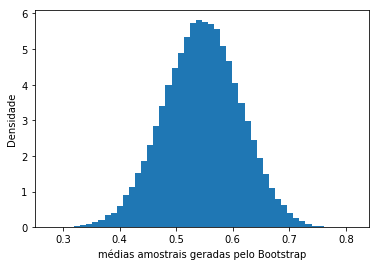

In [5]:
plt.hist(X_, density=True, bins=50)
plt.xlabel("médias amostrais geradas pelo Bootstrap")
plt.ylabel("Densidade");

___
### **Questão 2** - 

Montar as Hipóteses e o intervalo de confiança para média populacional (parâmetro de interesse) com um nível de confiança de $\gamma$% recomendado. Concluir em termos do problema!

### Hipóteses em termos do problema e em termos estatísticos

$H_0:$ Desconfiança dos funcionários não procede $\Rightarrow H_0: \mu=0.68$

$H_1:$ Desconfiança dos funcionários procede  $\Rightarrow H_1: \mu\neq0.68$

In [6]:
(np.percentile(X_, 2.5), np.percentile(X_, 97.5))

(0.4105645869615385, 0.6762629921153847)

**Conclusão:** Como o tempo médio de execução histórico $0.68$ não faz parte do intervalo de confiança que representa o ATUAL comportamento da linha de produção, então há evidências de que desconfiança procede, com 95% de confiança.

___
## Para ir além...

Como dito anteriormente, o método Bootstrapping pode ser utilizado para avaliar outras medidas númericas da população.

___
### **Questão 3** - 

**Considere que haja o seguinte questionamento sobre a linha de produção:**

Excepcionalmente hoje, os funcionários estavam reclamando que a dispersão no tempo de execução na linha de produção está com comportamento diferente do usual, pois o desvio padrão do tempo de execução histórico era igual a $0.27$ minutos. Ou seja, a variância histórica era igual a $0.0729$ minutos$^2$. 

Avalie se reclamação dos funcionários procede, com 95% de confiança?


1.Reconstruir a variância amostral $S^2$ usando o bootstrapping, considerando os dados em `x`.

In [7]:
B = 100000
S2 = []
for i in range(B):
    reamostra_x = np.random.choice(x, size=n, replace=True)
    S2.append(reamostra_x.var(ddof=1))

print("Média das médias amostrais: ", np.mean(S2))
print("Variância das médias amostrais: ", np.var(S2))

Média das médias amostrais:  0.05989798033375483
Variância das médias amostrais:  0.00037003842143844024


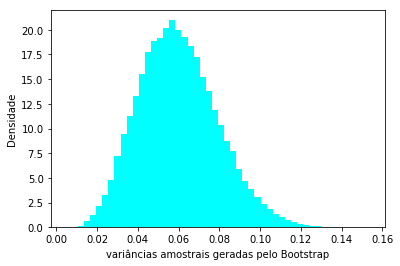

In [8]:
plt.hist(S2, density=True, bins=50, color='cyan')
plt.xlabel("variâncias amostrais geradas pelo Bootstrap")
plt.ylabel("Densidade");

2. Montar as Hipóteses e o intervalo de confiança para a variância populacional (parâmetro de interesse) com um nível de confiança de $\gamma$% recomendado. Concluir em termos do problema!

### Hipóteses em termos do problema e em termos estatísticos

$H_0:$ Desconfiança dos funcionários não procede $\Rightarrow H_0: \sigma^2=0.0729$

$H_1:$ Desconfiança dos funcionários procede  $\Rightarrow H_1: \sigma^2\neq0.0729$

In [9]:
(np.percentile(S2, 2.5), np.percentile(S2, 97.5))

(0.026179247811320226, 0.1007343278037376)

**Conclusão:** Como a variância historica $0.0729$ faz parte do intervalo de confiança que representa o ATUAL comportamento de dispersão do tempo da linha de produção, então não há evidências de que desconfiança procede, com 95% de confiança.